<h2> Draw a graph from result </h2>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def draw_csv(file_path):
    columns_name = ['Date', 'Uniq', 'New']
    df = pd.read_csv(file_path, sep='\t', engine='python', index_col=0, header=None, names=columns_name)
    df.plot(kind="line")
    #df.plot(kind="line", y="New")
    #df.plot(kind="line", y="Uniq")

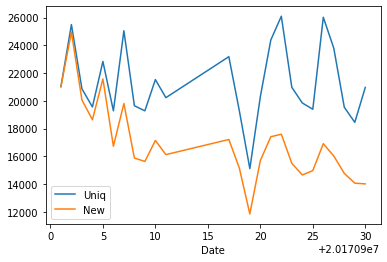

In [43]:
draw_csv("./csv/pay_63199/result")

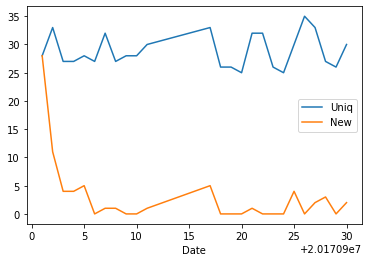

In [44]:
draw_csv("./csv/srcip_63199/result")

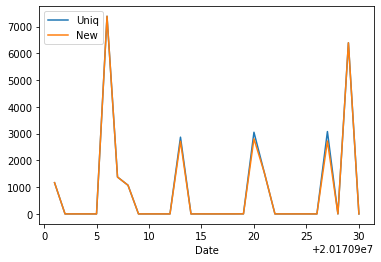

In [48]:
draw_csv("./csv/pay_42570/result")

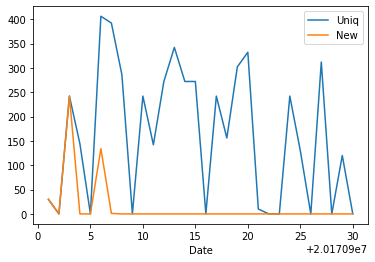

In [46]:
draw_csv("./csv/as42470_srcip/result")

In [28]:
!ls csv/as42470_srcip/

20170901.csv  20170907.csv  20170913.csv  20170919.csv	20170925.csv  result
20170902.csv  20170908.csv  20170914.csv  20170920.csv	20170926.csv  shinki.py
20170903.csv  20170909.csv  20170915.csv  20170921.csv	20170927.csv
20170904.csv  20170910.csv  20170916.csv  20170922.csv	20170928.csv
20170905.csv  20170911.csv  20170917.csv  20170923.csv	20170929.csv
20170906.csv  20170912.csv  20170918.csv  20170924.csv	20170930.csv


<h2>Make data base from darknet</h2>

In [1]:
import mysql.connector
from mysql.connector import Error 
import pandas as pd

In [2]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [3]:
pw = 'Ramen!yokosuka2023'
connection = create_server_connection("localhost", "pison", pw)

MySQL Database connection successful


In [5]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")

In [6]:
create_database_query = "CREATE DATABASE dark_test"
create_database(connection, create_database_query)

Error: '1007 (HY000): Can't create database 'dark_test'; database exists'


In [4]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [5]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [18]:
db = "dark_test"
create_dark_test_table = """
CREATE TABLE information (
    dstip_id INT PRIMARY KEY,
    srcip INT,
    time FLOAT
    );
"""
connection = create_db_connection("localhost", "pison", pw, db)
execute_query(connection, create_dark_test_table)

MySQL Database connection successful
Query successful


In [21]:
pop_data = """
INSERT INTO information VALUES
(8888, 1111, 22.22),
(9999, 3333, 55.55)
"""
connection = create_db_connection('localhost', 'pison', pw, db)
execute_query(connection, pop_data)

MySQL Database connection successful
Query successful


In [7]:
data = [
    ([6666], 2, 3.0),
    ([1234], 2, 3.0)
]
test_query = '''
INSERT INTO information (dstip_id, srcip, time) VALUES (%s, %s, %s)
'''
connection = create_db_connection('localhost', 'pison', pw, 'dark_test')
cursor = connection.cursor()
cursor.executemany(test_query, data)
connection.commit()
cursor.close()

MySQL Database connection successful


MySQLInterfaceError: Python type list cannot be converted

参考サイト：
1. PythonでMySQLデータベース作成：https://www.freecodecamp.org/japanese/news/connect-python-with-sql/

2. リストからMySQLデータベースへ挿入（INSERT):
https://python.softmoco.com/basics/python-mysql-insert.php